In [6]:
import pandas as pd
df = pd.read_csv('/content/train_E6oV3lV.csv')

# New section

In [7]:
len(df)

31962

In [8]:
print(len(df.columns))

3


In [9]:
df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [10]:
len(df.columns)

3

numbers of observation

In [11]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 31962
Number of Features: 3


Missing value

In [12]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

Target Attribute and predictor

In [13]:
label1 = df.iloc[:, 0:1]
label1.tail()

,id
31957,31958
31958,31959
31959,31960
31960,31961
31961,31962


In [14]:
text = df.iloc[:, 1:]
text.tail()

,label,tweet
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,0,thank you @user for you follow


Extracting the Label Feature for Each Class

In [15]:
hate_speech = df[df['label'] == 1].shape[0]
free_speech = df[df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


In [16]:
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

In [17]:
import matplotlib.pyplot as plt

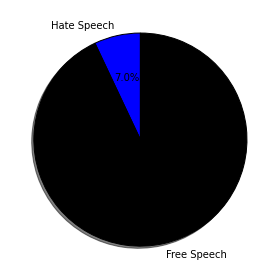

In [18]:
speech = [hate_speech, free_speech]
label = ["Hate Speech", "Free Speech"]

plt.pie(speech, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'}, 
        autopct = '%1.1f%%', startangle= 90, colors=['blue', 'black'])

plt.tight_layout()
plt.show()

Data Analysis

Lower Case

In [19]:
def lower_case(text):
    return text.lower()

df['tweet'] = df['tweet'].apply(lower_case)

In [20]:
import string

Remove URLs

In [21]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

Remove Punctuation

In [22]:
def remove_punct(text):
    return text.translate(str.maketrans('','',string.punctuation))

df['tweet'] = df['tweet'].apply(remove_punct)

Remove Special Characters

In [23]:
def remove_special(text):
    return " ".join(e for e in text.split() if e.isalnum())

df['tweet'] = df['tweet'].apply(remove_special)

In [24]:
import re

Removing @

In [25]:
def remove_tag(text):
    newtext= re.sub(r'(@[A-Za-z0-9]+)',"",text)
    return newtext

df['tweet'] = df['tweet'].apply(remove_tag)

Tokenizing

In [26]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [27]:
def tokenize(text):
    text = word_tokenize(text)
    return text

#

In [28]:
df['tweet'] = df['tweet'].apply(tokenize)

StopWords

In [29]:
from nltk.corpus import stopwords

In [30]:
def remove_stop(text):
    text  = [i for i in text if not i in stopwords.words('english')]
    return text



In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
df['tweet'] = df['tweet'].apply(remove_stop)

In [34]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [36]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

Lemmatization

In [37]:
def Lemmatize(text):
    word_lem = WordNetLemmatizer()
    text = [word_lem.lemmatize(token) for token in text]
    return text

df['tweet'] = df['tweet'].apply(Lemmatize)

In [38]:
!pip3 install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


WordCloud

In [39]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

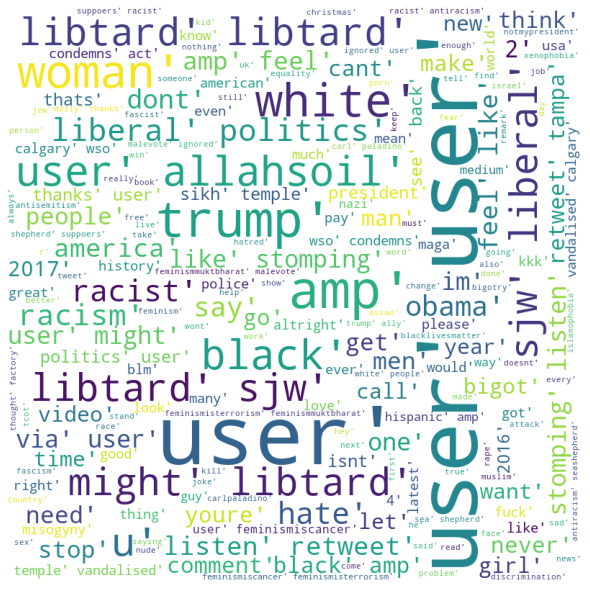

In [40]:
hate_speech = df[df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
     
 
    val = str(val)
 
    
    tokens = val.split()
     

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

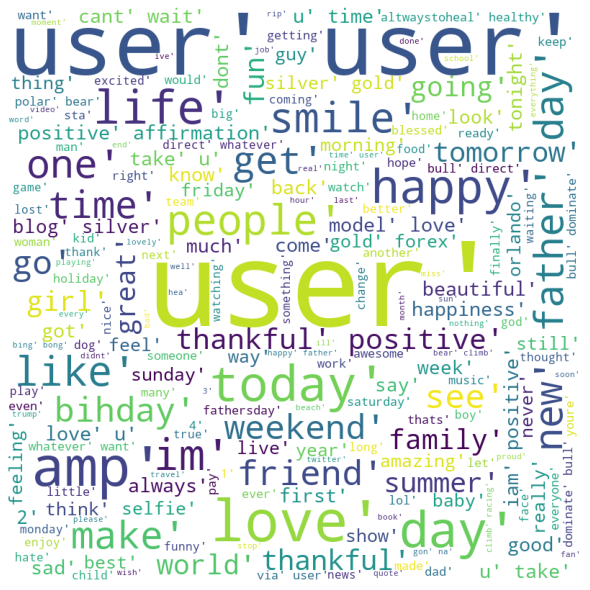

In [41]:
free_speech = df[df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in free_speech.tweet:
     
  
    val = str(val)
 
  
    tokens = val.split()
     
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Feature** **Extraction**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 2000)

In [43]:
list_to_str = []
for lists in df['tweet']:
    list_to_str.append(' '.join(map(str, lists)))

df['tweet'] = list_to_str

In [44]:
corpus = df['tweet']
text = vectorizer.fit_transform(corpus).toarray()

In [45]:
text.shape

(31962, 2000)

**Split the Dataset**

In [46]:
from sklearn.model_selection import train_test_split
label = df.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2, random_state=0)

In [47]:
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (25569, 2000)
y_train (25569,)


In [48]:
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_test (6393, 2000)
y_test (6393,)


**using Convolutional Neural Netowrk with Long Short Term Memory**

In [71]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Bidirectional, TimeDistributed, Conv1D, ZeroPadding1D, GRU
from tensorflow.keras.layers import Lambda, Input, Dropout, Masking, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model

In [72]:
def cnn_lstm(input_dim, output_dim, dropout=0.2, n_layers=1):

    
    dtype = 'float32'

   
    input_data = Input(name='the_input', shape=input_dim, dtype=dtype)

    x = Conv1D(filters=256, kernel_size=10, strides=4, name='conv_1')(input_data)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(dropout, name='dropout_1')(x)
        
    x = LSTM(128, activation='relu', return_sequences=True,
             dropout=dropout, name='lstm_1')(x)
    x = LSTM(128, activation='relu', return_sequences=False,
              dropout=dropout, name='lstm_2')(x)
    
    x = Dense(units=64, activation='relu', name='fc')(x)
    x = Dropout(dropout, name='dropout_2')(x)

   
    y_pred = Dense(units=output_dim, activation='sigmoid', name='sigmoid')(x)

    network_model = Model(inputs=input_data, outputs=y_pred)
    
    return network_model

model = cnn_lstm(X_train.shape[0:], 1)

In [73]:
model = cnn_lstm(X_train.shape[:], 1)

In [99]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
